In [1]:
#pip install yfinance

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def compare_eps():
    try:
        print("provide stock tickers to compare")
        user_tick1 = input()
        user_tick2 = input()

        #format user inputs
        user_tick1 = str.upper(user_tick1).strip()
        user_tick2 = str.upper(user_tick2).strip()

        #ticker instances
        ticker1 = yf.Ticker(user_tick1)
        ticker2 = yf.Ticker(user_tick2)

        #accessing ticker attribute that returns dataframe of EPS data
        eps_1 = ticker1.earnings_history
        eps_2 = ticker2.earnings_history
        eps_1.reset_index(inplace = True)
        eps_2.reset_index(inplace = True)

        #setting y axis range based on selected stock tickers
        y_min = min(min(eps_1['epsEstimate']),min(eps_1['epsActual']),min(eps_2['epsEstimate']),min(eps_2['epsActual']))
        y_max = max(max(eps_1['epsEstimate']),max(eps_1['epsActual']),max(eps_2['epsEstimate']),max(eps_2['epsActual']))

        #create side by side visualization
        fig=plt.figure(figsize=(12,5))
        plt.suptitle(f'{user_tick1} vs {user_tick2} EPS, Quarterly', fontsize=16)

        #subplot one
        #act1, est1 are unpacked and stored to build chart legend
        plt.subplot(1,2,1)           
        act1,=plt.plot(eps_1['quarter'],eps_1['epsActual'],'bo')
        est1,=plt.plot(eps_1['quarter'],eps_1['epsEstimate'],'go')
        plt.axis([min(eps_1['quarter'])+pd.DateOffset(months=-1),max(max(eps_1['quarter']),max(eps_2['quarter']))+pd.DateOffset(months=1),y_min-1,y_max+2])
        plt.xlabel("Date")
        plt.ylabel("USD")
        plt.xticks(rotation=25)
        plt.title(f"{user_tick1}")

        #subplot two
        plt.subplot(1,2,2)           
        plt.plot(eps_2['quarter'],eps_2['epsActual'],'bo')
        plt.plot(eps_2['quarter'],eps_2['epsEstimate'],'go')
        plt.axis([min(eps_1['quarter'])+pd.DateOffset(months=-1),max(max(eps_1['quarter']),max(eps_2['quarter']))+pd.DateOffset(months=1),y_min-1,y_max+2])
        plt.xticks(rotation=25)
        plt.title(f"{user_tick2}")
        plt.xlabel("Date")
        plt.ylabel("USD")
        plt.legend((act1,est1),('actual','estimate'),loc='upper right')
        plt.tight_layout()  
    
    #error message
    except:
        print()
        print("A stock ticker entered is invalid.  Try again.")

provide stock tickers to compare


 lyft
 uber


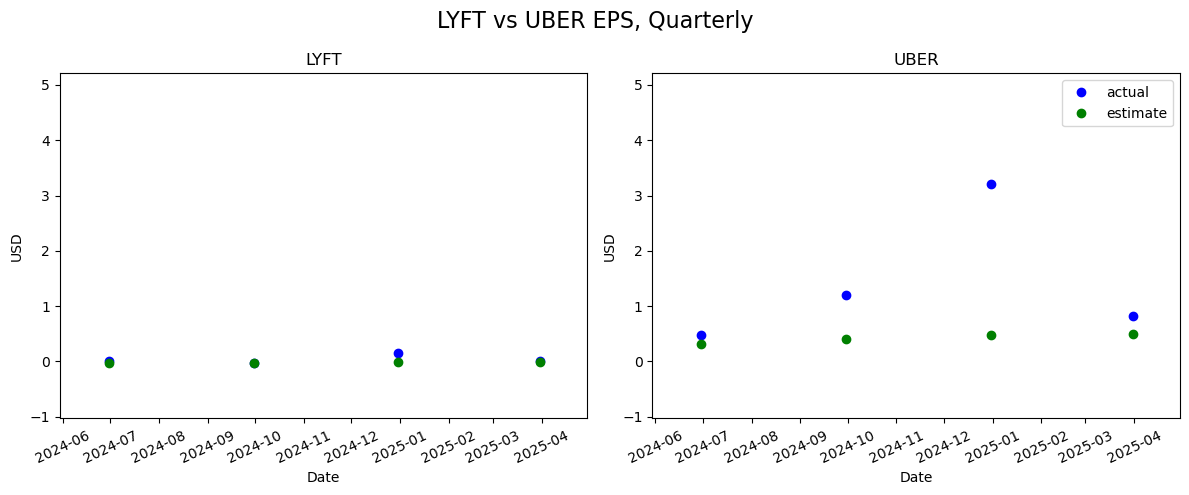

In [4]:
compare_eps()